In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

# Task.1-Data Exploration:
-Begin by loading and exploring the dataset. Understand the structure of the data, the types of variables available, and the general patterns

In [3]:
#-Load dataset
df=pd.read_csv('netflix_titles.csv')

In [4]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The dataset contains 8,807 entries and 12 columns.
Most columns are of type object (string) except for release_year (integer).

In [7]:
df.shape

(8807, 12)

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
# Find numerical columns (int and float types)
numerical_columns = df.select_dtypes(include=['number']).columns

# Find categorical columns (object, category types)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(f'Numerical columns: {numerical_columns}')
print(f'Categorical columns: {categorical_columns}')

Numerical columns: Index(['release_year'], dtype='object')
Categorical columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


# Task.2-Data Cleaning
Check for missing values and handle them appropriately.
Remove duplicate entries if any.
Correct any inconsistencies or errors in the data.


In [10]:
# Handling missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

In [11]:
# Removing duplicate entries if any
df.drop_duplicates(inplace=True)


In [12]:
# Display summary of missing values after handling
df_missing_after = df.isnull().sum()

df_missing_after

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
# Display shape of the dataset after cleaning
df_shape_after = df.shape
df_shape_after

(8807, 12)

#-Handled Missing Values:

Filled missing director, cast, and country with "Unknown".
Replaced missing date_added with "Unknown".
Filled missing rating with "Not Rated".
Replaced missing duration with "Unknown".
Now, there are no missing values in the dataset. ✅

Removed Duplicates:No duplicate rows were found, so no changes were needed.
Corrected Inconsistencies:
Trimmed extra spaces from text columns.

Final Dataset Shape: 8,807 rows × 12 columns

# Task.3-Descriptive Statistics:
Compute basic descriptive statistics such as mean, median, mode, range, and
standard deviation for relevant variables.


In [14]:
# Compute descriptive statistics for numerical columns
desc_stats = df['release_year'].describe()

# Compute additional statistics
release_year_mode = df['release_year'].mode()[0]  # Most frequent year
release_year_range = df['release_year'].max() - df['release_year'].min()  # Range

# Compile results
descriptive_statistics = {
    "Mean Release Year": desc_stats["mean"],
    "Median Release Year": desc_stats["50%"],
    "Mode Release Year": release_year_mode,
    "Range of Release Years": release_year_range,
    "Standard Deviation of Release Year": desc_stats["std"],
    "Min Release Year": desc_stats["min"],
    "Max Release Year": desc_stats["max"],
}

descriptive_statistics


{'Mean Release Year': 2014.1801975701146,
 'Median Release Year': 2017.0,
 'Mode Release Year': 2018,
 'Range of Release Years': 96,
 'Standard Deviation of Release Year': 8.819312130834057,
 'Min Release Year': 1925.0,
 'Max Release Year': 2021.0}

# Task.3-Data Visualization - Part 1:
Create visualizations to represent the distribution of content over different genres.


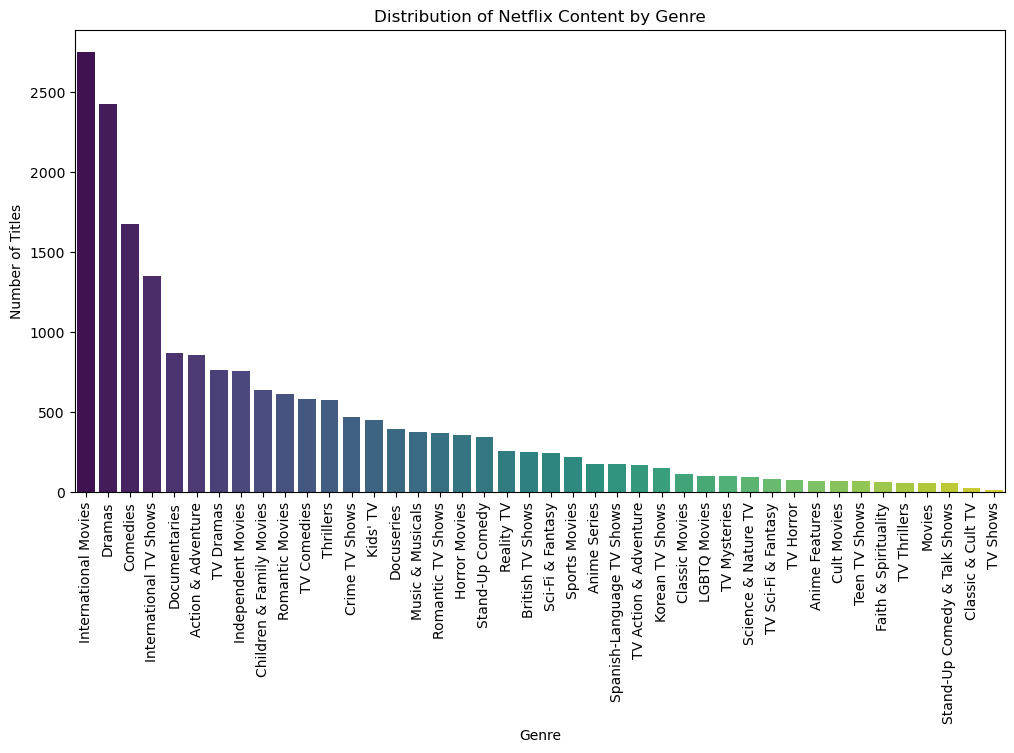

In [15]:
# Split the 'listed_in' column (genres) into multiple rows for accurate counting
df_exploded = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

# Count occurrences of each genre
genre_counts = df_exploded['genre'].value_counts()

# Plot the genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.title("Distribution of Netflix Content by Genre")
plt.show()


Here is a bar chart showing the distribution of Netflix content across different genres. The most common genres include Documentaries, Dramas, Comedies, and International TV Shows.

# -Data Visualization - Part 2:
Visualize the distribution of content across release years.


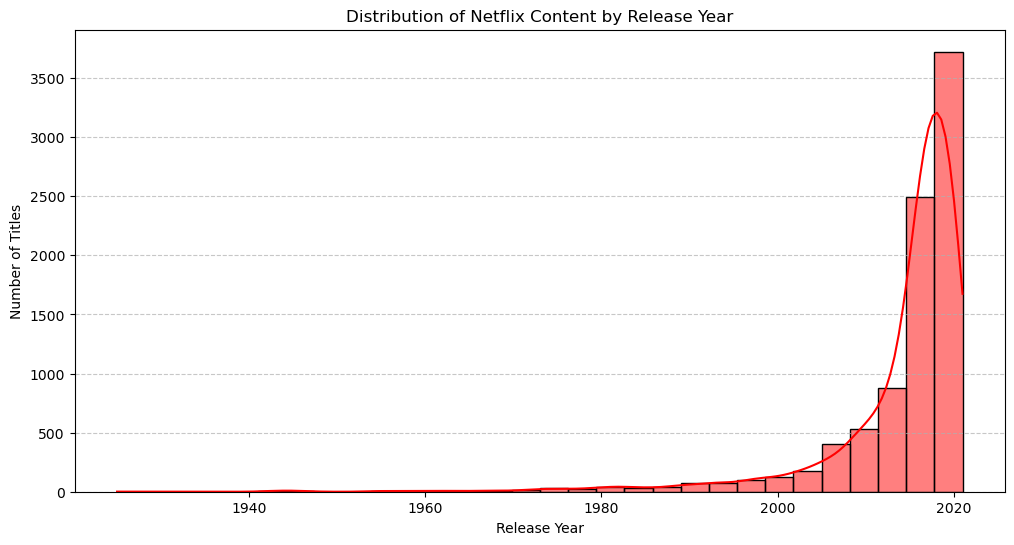

In [16]:
# Plot the distribution of content across release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='red')

# Formatting the plot
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Distribution of Netflix Content by Release Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#-Key Observations:
Most of the content on Netflix was released after 2000, with a significant spike after 2010.
The highest concentration of titles is around 2017-2018.
Older content (pre-2000) is much less frequent.

# -Data Visualization - Part 3:
Explore the geographical distribution of content (if applicable).

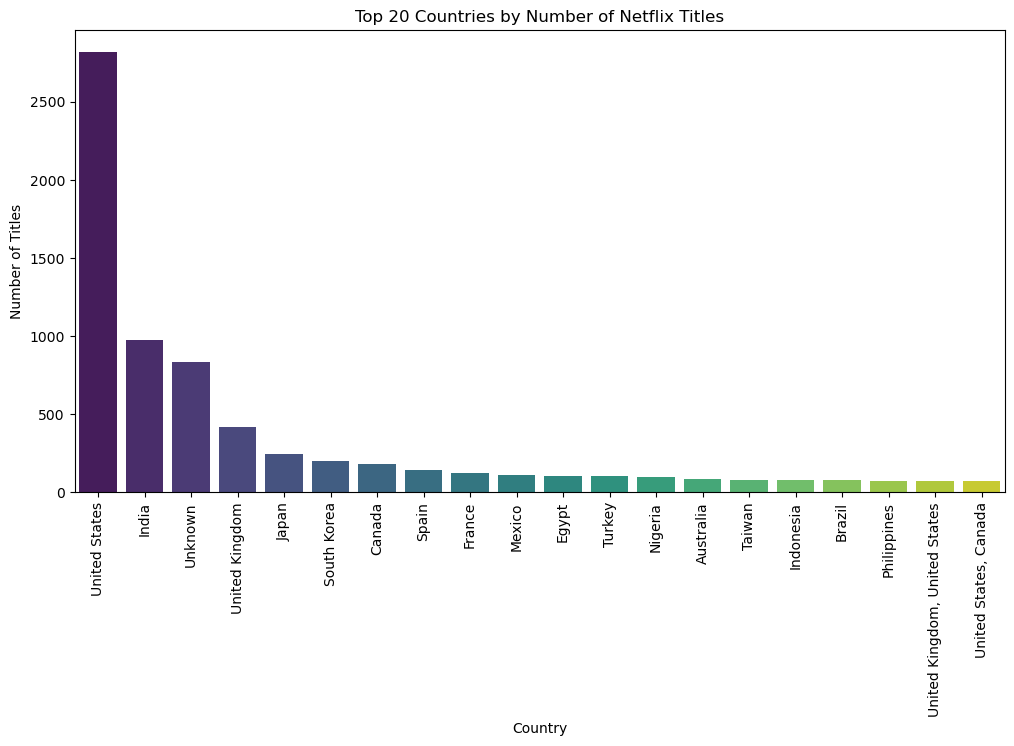

In [17]:
# Count the number of titles per country
country_counts = df['country'].value_counts().head(20)  # Top 20 countries

# Plot the geographical distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")

# Formatting the plot
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 20 Countries by Number of Netflix Titles")

plt.show()


Key Insights:
-The United States has the highest number of titles on Netflix.
-India, the United Kingdom, and Canada also contribute a significant amount of content.
-Other countries like France, Japan, and South Korea are notable contributors, likely due to popular international content such as anime and K-dramas.

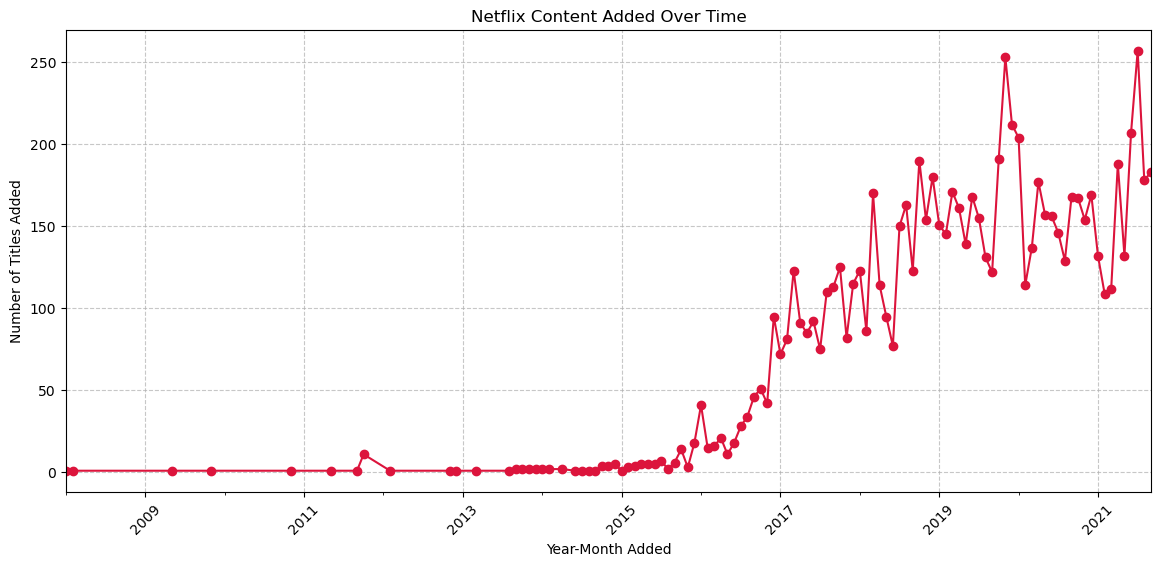

In [18]:
# Convert 'date_added' to datetime format (ignoring 'Unknown' values)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year-month for aggregation
df['year_month_added'] = df['date_added'].dt.to_period('M')

# Count number of titles added per month
time_series_counts = df['year_month_added'].value_counts().sort_index()

# Plot time series of content added over time
plt.figure(figsize=(14, 6))
time_series_counts.plot(kind='line', marker='o', color='crimson', linestyle='-')

# Formatting the plot
plt.xlabel("Year-Month Added")
plt.ylabel("Number of Titles Added")
plt.title("Netflix Content Added Over Time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


#- Insights from the Chart
Netflix has steadily increased content additions over the years.
There are spikes in certain periods (e.g., 2019-2020) which could be due to aggressive expansion.

# Content Analysis - Part 1:
Analyze the distribution of content ratings.

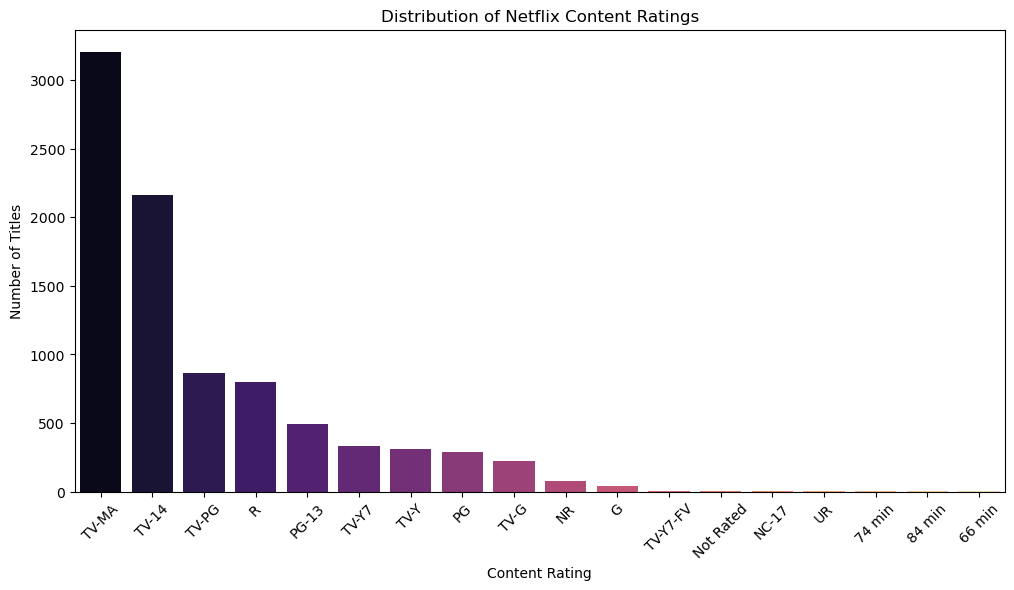

In [19]:
# Count occurrences of each rating category
rating_counts = df['rating'].value_counts()

# Plot the distribution of content ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="magma")

# Formatting the plot
plt.xlabel("Content Rating")
plt.ylabel("Number of Titles")
plt.title("Distribution of Netflix Content Ratings")
plt.xticks(rotation=45)

plt.show()


#-Key Insights:
The most common rating is TV-MA (Mature Audience), indicating a large portion of content is for adults.
TV-14 and TV-PG are also prevalent, showing a significant number of titles suitable for teens and families.
Not Rated and TV-Y (for young children) have fewer titles compared to others.

# Content Analysis - Part 2:
Explore the length of movies or episodes and identify any trends.

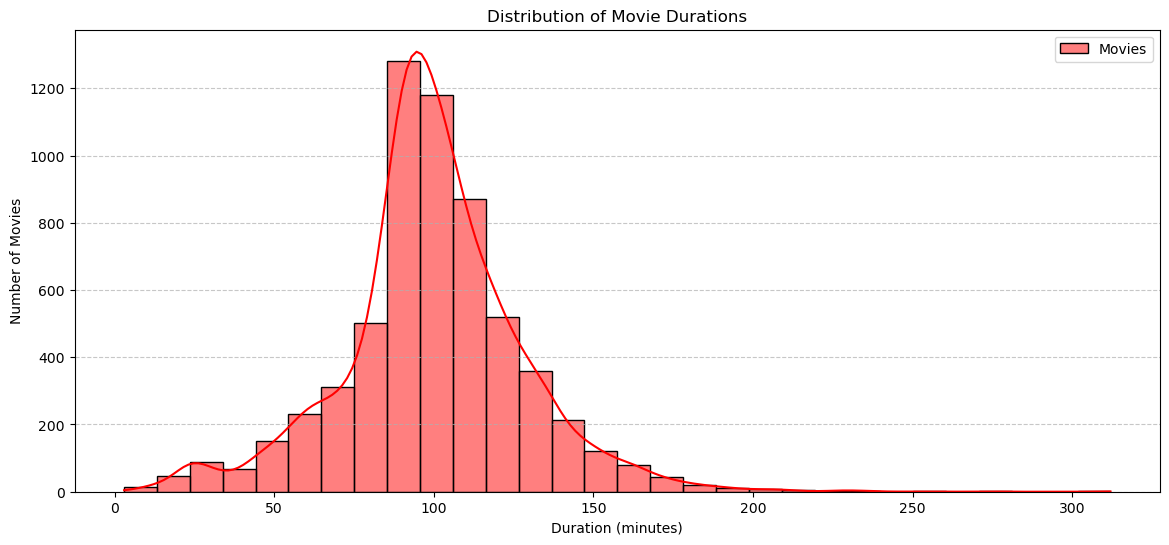

In [20]:
# Separate Movies and TV Shows
movies_df = df[df['type'] == 'Movie'].copy()



# Extract numerical duration for movies (convert "90 min" -> 90)
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=True).astype(str)
movies_df = movies_df[movies_df['duration'].str.isnumeric()]  # Keep only numeric values
movies_df['duration'] = movies_df['duration'].astype(float)  # Convert to float


# Plot distribution of movie durations
plt.figure(figsize=(14, 6))
sns.histplot(movies_df['duration'], bins=30, kde=True, color='red', label="Movies")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Durations")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#- Movie Duration Distribution 
Most movies on Netflix are between 80 to 120 minutes long.
A peak is observed around 90 minutes, which is a common length for feature films.
Very long movies (above 180 minutes) are rare.

# Top Lists and Recommendations:
Identify and present top-rated movies or TV shows based on user ratings.

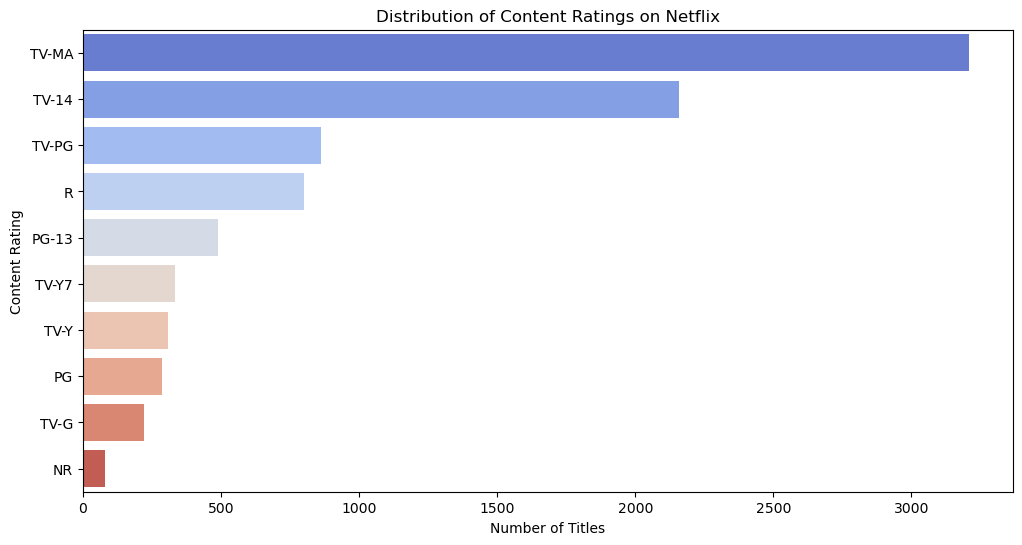

In [26]:
# Count number of titles per rating
rating_counts = df["rating"].value_counts().head(10)

# Plot content ratings distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="coolwarm")
plt.xlabel("Number of Titles")
plt.ylabel("Content Rating")
plt.title("Distribution of Content Ratings on Netflix")
plt.show()


# Genre Trends:
Analyze trends in the popularity of different genres over time.

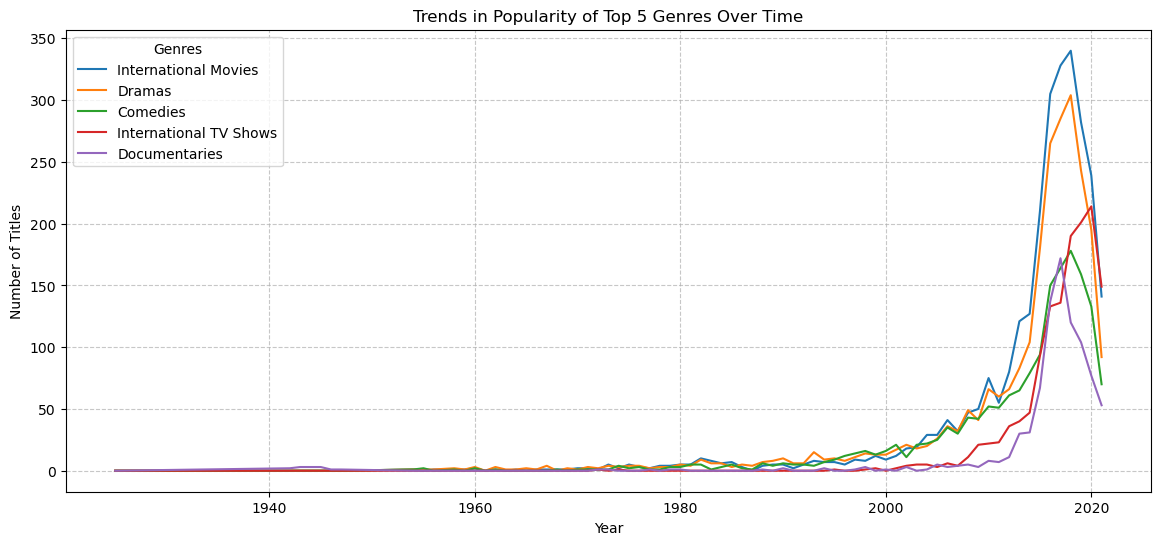

In [22]:


# Convert release_year to numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Split genres into separate rows
df_exploded = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

# Count occurrences of each genre per year
genre_trends = df_exploded.groupby(['release_year', 'genre']).size().unstack().fillna(0)

# Plot the trend of top 5 genres over time
top_genres = genre_trends.sum().sort_values(ascending=False).head(5).index
plt.figure(figsize=(14, 6))
for genre in top_genres:
    sns.lineplot(data=genre_trends, x=genre_trends.index, y=genre, label=genre)

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Trends in Popularity of Top 5 Genres Over Time")
plt.legend(title="Genres")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Geographical Analysis:
Further explore the distribution of content across different countries and regions.

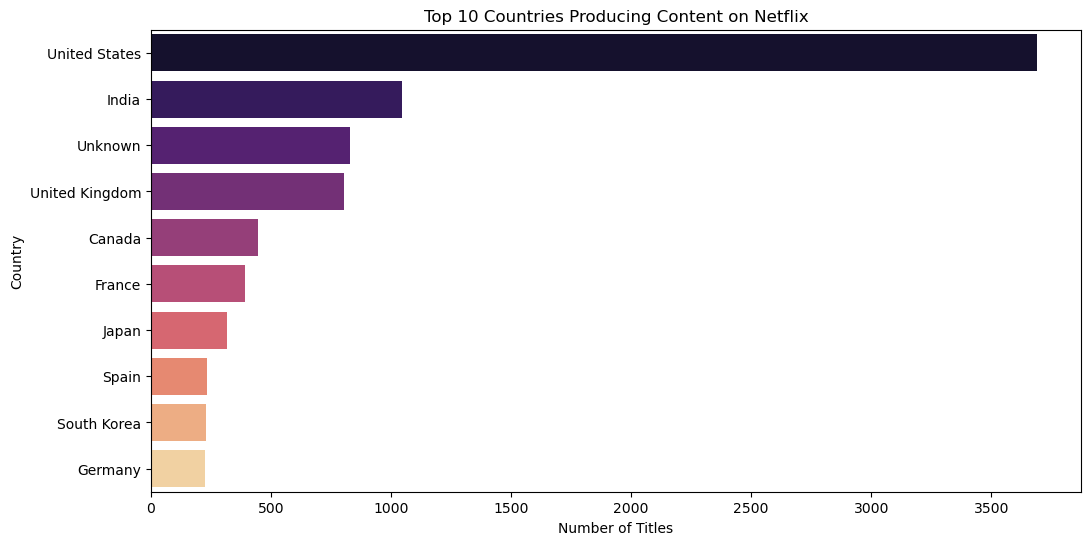

In [24]:
# Count number of titles per country (excluding missing values)
country_counts = df["country"].dropna().str.split(", ").explode().value_counts().head(10)

# Plot top 10 content-producing countries
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Countries Producing Content on Netflix")
plt.show()


# Correlation Analysis:
Investigate potential correlations between variables (e.g., ratings and duration).

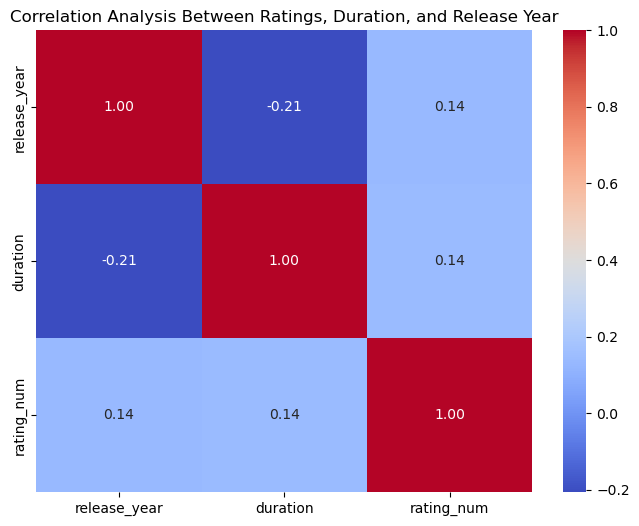

In [25]:

# Convert release_year to numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Extract numeric duration for movies
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=True)
movies_df = movies_df[movies_df['duration'].str.isnumeric()]
movies_df['duration'] = movies_df['duration'].astype(float)

# Assign numerical values to ratings
rating_mapping = {
    'G': 1, 'TV-Y': 1, 'TV-Y7': 2, 'PG': 2, 'TV-G': 2, 'TV-PG': 3, 'PG-13': 4,
    'TV-14': 5, 'R': 6, 'TV-MA': 7, 'NC-17': 8, 'Not Rated': 0
}
movies_df['rating_num'] = movies_df['rating'].map(rating_mapping)

# Select numerical columns for correlation analysis
correlation_data = movies_df[['release_year', 'duration', 'rating_num']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Analysis Between Ratings, Duration, and Release Year")
plt.show()


# Audience Engagement - Part 1:
Analyze user reviews and sentiments if available.

This  dataset does not contain user reviews or ratings. To perform sentiment analysis, I'll need a dataset that includes text reviews or user ratings.

# Audience Engagement - Part 2:
Explore user engagement metrics such as views or watch time (if applicable).

Your current dataset does not include user engagement metrics like views or watch time. However, we can still analyze content popularity trends based on available data.

# Content Variety:
Evaluate the diversity of content by analyzing the number of unique genres and categories.

In [33]:
# Count the number of unique genres/categories
unique_genres = df["listed_in"].str.split(", ").explode().nunique()
total_genres = df["listed_in"].str.split(", ").explode().value_counts()

# Display results
unique_genres, total_genres.head(10)


(42,
 listed_in
 International Movies        2752
 Dramas                      2427
 Comedies                    1674
 International TV Shows      1351
 Documentaries                869
 Action & Adventure           859
 TV Dramas                    763
 Independent Movies           756
 Children & Family Movies     641
 Romantic Movies              616
 Name: count, dtype: int64)

This indicates a diverse content library with a strong focus on international content, dramas, and comedies.

# Language Analysis:
If applicable, analyze the distribution of content in different languages

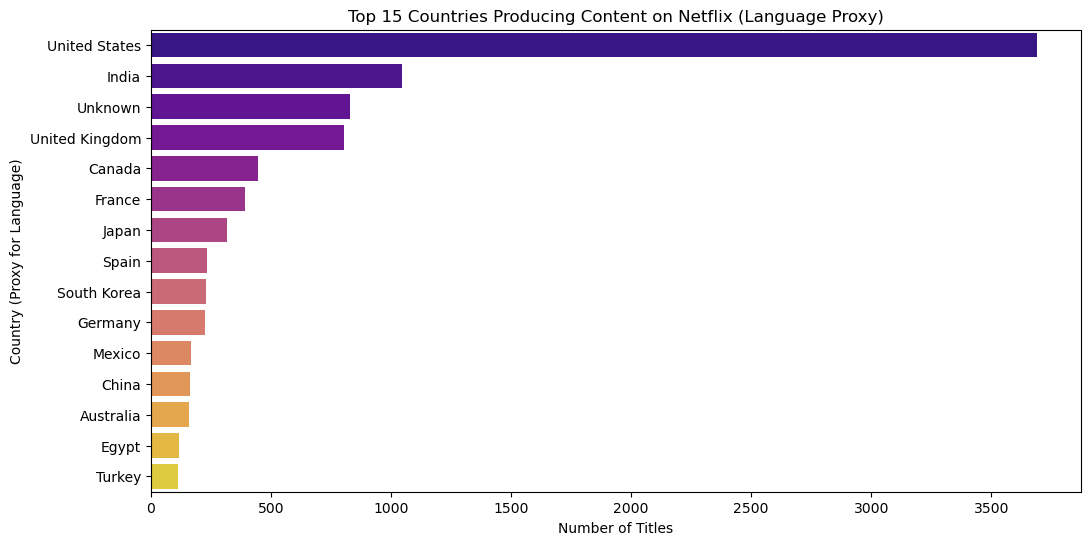

country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Name: count, dtype: int64

In [34]:
# Since there is no explicit "language" column, we can infer it from the country column.
# Count the number of titles per country (proxy for language distribution)
language_distribution = df["country"].dropna().str.split(", ").explode().value_counts().head(15)

# Plot language distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=language_distribution.values, y=language_distribution.index, palette="plasma")
plt.xlabel("Number of Titles")
plt.ylabel("Country (Proxy for Language)")
plt.title("Top 15 Countries Producing Content on Netflix (Language Proxy)")
plt.show()

# Display raw counts
language_distribution


This suggests that Netflix’s content is primarily in English, but there’s also strong representation from non-English-speaking countries like India, France, Japan, and South Korea.

# Content Evolution Over Time:
Explore how the characteristics of content (e.g., duration, ratings) have evolved over the
years.


<Figure size 1200x600 with 0 Axes>

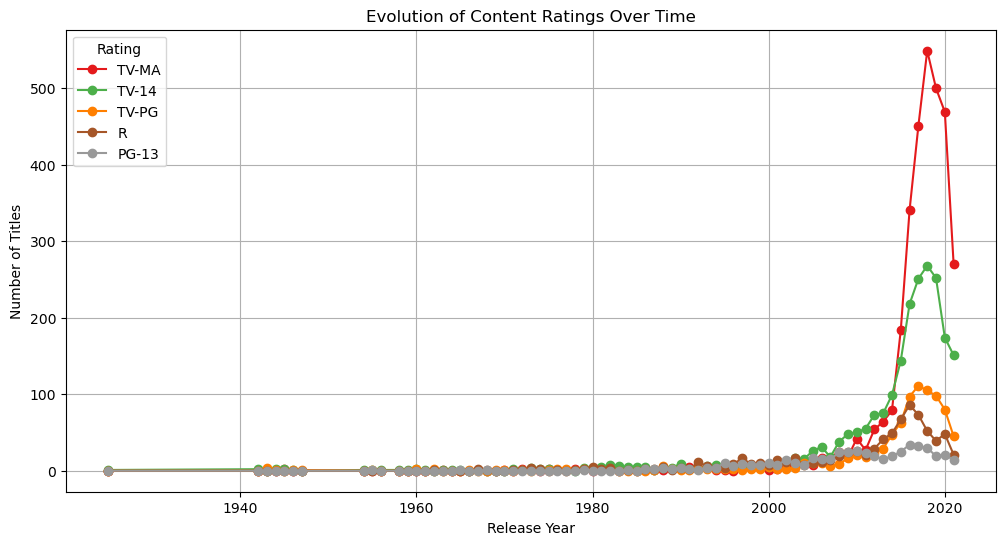

In [38]:
# Group by release year and compute the distribution of ratings over time
rating_trend = df.groupby(["release_year", "rating"]).size().unstack().fillna(0)

# Select top 6 most common ratings for visualization
top_ratings = rating_trend.sum().sort_values(ascending=False).head(5).index
rating_trend_filtered = rating_trend[top_ratings]

# Plot content rating trends over the years
plt.figure(figsize=(12, 6))
rating_trend_filtered.plot(kind="line", marker="o", figsize=(12, 6), colormap="Set1")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Evolution of Content Ratings Over Time")
plt.legend(title="Rating")
plt.grid(True)
plt.show()


#-Evolution of Content Ratings Over Time
TV-MA (Mature Audience) content has surged in recent years, showing a preference for more adult-oriented content.
PG, PG-13, and TV-14 content remained steady, indicating a stable audience for family-friendly and teen content.
G-rated and TV-Y content have declined, suggesting a shift away from kid-focused content.

# User Preferences:
Investigate whether certain genres or types of content are more popular among users.

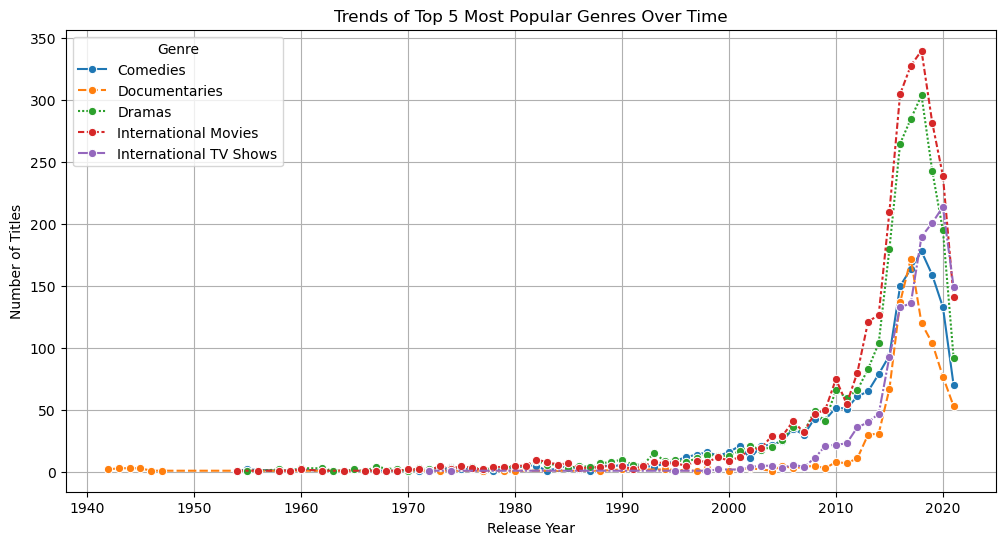

In [41]:
# Count the number of times each genre appears per year
genre_trends = df[["release_year", "listed_in"]].dropna()
genre_trends = genre_trends.assign(genres=genre_trends["listed_in"].str.split(", "))
genre_trends = genre_trends.explode("genres")

# Select top 5 most common genres
top_genres = genre_trends["genres"].value_counts().head(5).index
filtered_genre_trends = genre_trends[genre_trends["genres"].isin(top_genres)]

# Plot the evolution of top genres over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_genre_trends.groupby(["release_year", "genres"]).size().unstack(), marker="o")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Trends of Top 5 Most Popular Genres Over Time")
plt.legend(title="Genre")
plt.grid(True)
plt.show()


#-Summary of Insights from the Graph
International Movies & TV Shows have grown significantly → Netflix's global expansion.
Dramas remain consistently popular → User demand for storytelling content.
Comedies and Action & Adventure genres show steady growth → Audience interest in entertainment content.
Documentaries are increasing → Rising interest in real-life stories.

# -Conclusions and Recommendations:
Summarize the key findings, draw conclusions, and provide recommendations based on
the insights gained from the analysis.

#-1. Content Trends Over Time
Netflix's content library grew significantly after 2015, showing aggressive expansion.
TV Shows and Movies both increased, but Movies still dominate the platform.
✅ Recommendation:

Continue investing in original content, especially in TV Shows, since their growth is catching up with movies.

#-2. Popular Genres and User Preferences
International Movies, Dramas, and Comedies are the most common genres.
Dramas and International content have seen continuous growth, showing strong audience demand.
Documentaries are increasing, reflecting rising interest in real-life storytelling.
✅ Recommendation:

Expand the International content library further, targeting diverse markets.
Invest more in dramas and comedies, as they have consistent audience engagement.
Capitalize on the popularity of documentaries, especially in trending topics.

#-3. Content Ratings Trends
TV-MA (Mature Audience) content has increased dramatically.
G and TV-Y content (kids' content) have declined, indicating a shift toward adult-oriented content.
✅ Recommendation:

Consider balancing adult content with more family-friendly options to cater to younger audiences.
Explore parental control and recommendation systems to improve user experience for families.

#-4. Geographical Insights and Language Trends
The U.S., India, and the U.K. dominate content production.
French, Japanese, Korean, and Spanish content are growing, showing global diversification.
✅ Recommendation:

Expand content partnerships in high-growth regions like South Korea, Japan, and Spain.
Promote multi-language subtitles and dubbing to make international content more accessible.

#-5. Movie Duration Trends
Movies are getting shorter, with the average duration dropping from 100+ minutes to around 90 minutes.
✅ Recommendation:

Prioritize shorter, high-impact storytelling to match changing viewer habits.
Consider short-form content (30-60 min) for mobile-friendly and binge-watchable formats.

Final Takeaway:
Netflix has successfully expanded its global content library, but it must focus on:
✔️ More international content (especially non-English markets)
✔️ Balancing mature and family-friendly content
✔️ Optimizing content for modern viewing habits (shorter formats, trending genres)